In [24]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [7]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [8]:
PHIdf = gdf[gdf.Tm == 'PHI']
INDdf = gdf[gdf.Tm == 'IND']


In [9]:
PHIdf.Date = PHIdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
PHIdf = PHIdf[(PHIdf['Date'] > pd.to_datetime('20191023', format='%Y%m%d', errors='ignore')) & (PHIdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

INDdf.Date = INDdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
INDdf = INDdf[(INDdf['Date'] > pd.to_datetime('20191023', format='%Y%m%d', errors='ignore'))& (INDdf['Date'] <= pd.to_datetime('20200310', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

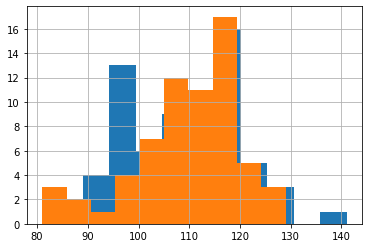

In [13]:
PHIdf.TeamPTS.hist()
INDdf.TeamPTS.hist()

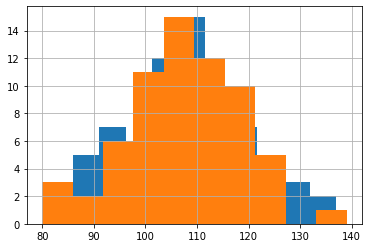

In [14]:
PHIdf.OpponentPTS.hist()
INDdf.OpponentPTS.hist()

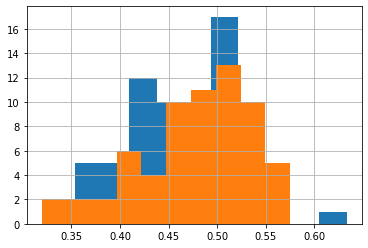

In [15]:
PHIdf.TeamFGP.hist()
INDdf.TeamFGP.hist()

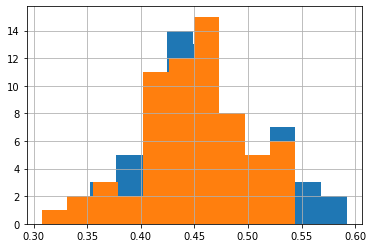

In [16]:
PHIdf.OpponentFGP.hist()
INDdf.OpponentFGP.hist()

In [17]:
PHImeanpts = PHIdf.TeamPTS.mean()
INDmeanpts = INDdf.TeamPTS.mean()
PHIfgp = PHIdf.TeamFGP.mean()
INDfgp = INDdf.TeamFGP.mean()
PHIsdpts = PHIdf.TeamPTS.std()
INDsdpts = INDdf.TeamPTS.std()

PHImeaINDp = PHIdf.OpponentPTS.mean()
INDmeaINDp = INDdf.OpponentPTS.mean()
PHIfgpopp = PHIdf.OpponentFGP.mean()
INDfgpopp = INDdf.OpponentFGP.mean()
PHIsdopp = PHIdf.OpponentPTS.std()
INDsdopp = INDdf.OpponentPTS.std()

print("PHI Mean ", PHImeanpts)
print("PHI FG% ", PHIfgp)
print("PHI Points Standard Deviation ", PHIsdpts)
print("IND Points Mean ", INDmeanpts)
print("IND FG% ", INDfgp)
print("IND Points Standard Deviation ", INDsdpts)

print("PHI OppPoints Mean ", PHImeaINDp)
print("PHI OppFG% Mean ", PHIfgpopp)
print("PHI OppPoints SD ", PHIsdopp)
print("IND OppPoints Mean ", INDmeaINDp)
print("IND OppFG% Mean ", INDfgpopp)
print("IND OppPoints SD ", INDsdopp)

PHI Mean  109.58461538461539
PHI FG%  0.46556923076923085
PHI Points Standard Deviation  11.309415750399515
IND Points Mean  109.33846153846154
IND FG%  0.4787076923076923
IND Points Standard Deviation  10.268697767787007
PHI OppPoints Mean  107.36923076923077
PHI OppFG% Mean  0.4641384615384616
PHI OppPoints SD  10.945274709276989
IND OppPoints Mean  107.4
IND OppFG% Mean  0.44876923076923064
IND OppPoints SD  11.191235409908952


In [18]:
def gameSim():
    PHIScore = (rnd.gauss(PHImeanpts,PHIsdpts)+ rnd.gauss(INDmeaINDp,INDsdopp))/2
    INDScore = (rnd.gauss(INDmeanpts,INDsdpts)+ rnd.gauss(INDmeaINDp,INDsdopp))/2
    if int(round(PHIScore)) > int(round(INDScore)):
        return 1
    elif int(round(PHIScore)) < int(round(INDScore)):
        return -1
    else: return 0

In [20]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('PHI Win ', team1win/(team1win+team2win),'%')
    print('IND Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [21]:
gAmesSim(10000)

PHI Win  0.5036239387036654 %
IND Win  0.49637606129633466 %


[-1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 